# LINEAR REGRESSION

In [1]:
%%latex
Regressions methods tries to explain a given data with other through curves. For linear regressions this curve is a line, and it could happen with many varaibles so its called multilinear regression.
Given $y_{1} ... y_{n}$ and $x_{1} ... x_{p}$ the n-equation is:



<IPython.core.display.Latex object>

In [2]:
%%latex
$$y_{n} = \beta _{1}x_{1} + ... + \beta _{p}x_{p} + \beta _{0}$$

<IPython.core.display.Latex object>

### BASICS

First of all I'm going to show the basic idea about this method.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Given a collect of data

In [4]:
x = 24 * np.random.random(20)
a = 4.5
b = 0.75
y = a * x + b + np.random.normal(size=x.shape)

Create the model and fit it

In [5]:
linear_method = LinearRegression()
linear_method.fit(x[:, None], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Predict new y data with new x data

In [6]:
x_new = np.linspace(0, 24, 100)
y_new = linear_method.predict(x_new[:, None])

Plot the results

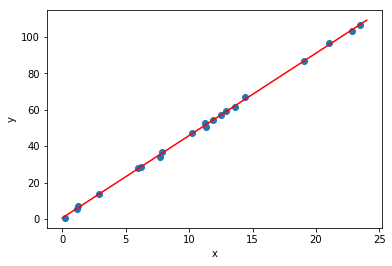

In [7]:
x_axe = plt.axes()
x_axe.scatter(x, y)
x_axe.plot(x_new, y_new, color='red')
x_axe.set_xlabel('x')
x_axe.set_ylabel('y')
x_axe.axis('on')
plt.show()

### BOSTON DATASET

Scikit-Learn has a collect of datasets to use for use the methods. I am going to use the Boston dataset to apply the linear regression

In [32]:
from sklearn import datasets
boston_ds = datasets.load_boston()

Take a look to the data

In [33]:
print(boston_ds.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [34]:
print('The data has ' + str(boston_ds.data.shape[0]) + ' rows and ' + str(boston_ds.data.shape[1]) + ' cols')

The data has 506 rows and 13 cols


In [35]:
boston_df = pd.DataFrame(boston_ds.data, columns=boston_ds.feature_names)
boston_df['Target'] = boston_ds.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Starts initializing the model

In [36]:
lr_model = LinearRegression(normalize=True)
print('The model in use is: ', lr_model)

The model in use is:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


Using all the data as train and as test

In [37]:
lr_model.fit(boston_ds.data, boston_ds.target)
score_1 = lr_model.score(boston_ds.data, boston_ds.target)
print('The value of the R² is: ', round(score_1,4))

The value of the R² is:  0.7406


Taking a percentage of data to train and the other to test

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(boston_ds.data, boston_ds.target, test_size=0.3)
lr_model.fit(x_train, y_train)
score_2 = lr_model.score(x_test, y_test)
print('The value of the R² is: ', round(score_2,4))

The value of the R² is:  0.7564


The coefficient that solve the problem of the linear regression are:

In [40]:
coef_list = list(zip(boston_ds.feature_names, lr_model.coef_))
for coef in coef_list:
    print(coef)

('CRIM', -0.11331950211735199)
('ZN', 0.049261139315877035)
('INDUS', 0.02971324177843554)
('CHAS', 1.5413486538340524)
('NOX', -9.82221991245364)
('RM', 3.7073009238516956)
('AGE', -0.020399492383647112)
('DIS', -1.2748139733381691)
('RAD', 0.30807239332059033)
('TAX', -0.015395424506374197)
('PTRATIO', -0.8557176619425644)
('B', 0.008788651099841994)
('LSTAT', -0.46011205068110844)


As the previous cell say, RM feature is what more influence has in the target so, lets to plot it

In [41]:
x = np.asmatrix(boston_df['RM'].values).T
y = np.asmatrix(boston_df['Target'].values).T
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

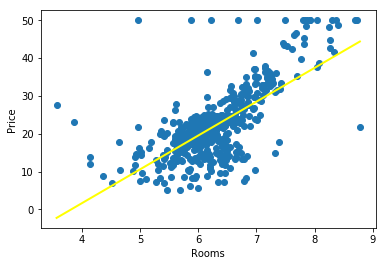

The value of the R² is:  0.4266


In [42]:
lr_one = LinearRegression()
lr_one.fit(x_train, y_train)
fig, ax = plt.subplots()
ax.scatter(boston_df['RM'].values, boston_df['Target'].values)
xmin = x.min()
xmax = x.max()
ax.set_xlabel('Rooms')
ax.set_ylabel('Price')
ax.plot([xmin, xmax], lr_one.predict([[xmin], [xmax]]), '-', color='yellow', lw=2)
plt.show()
score_3 = lr_one.score(x_test, y_test)
print('The value of the R² is: ', round(score_3,4))

So as we can see try to explain the price of the houses only with the number of rooms is not an appropriate way to solve it.

### DIABETES DATASET

In [43]:
diabetes_ds = datasets.load_diabetes()

In [44]:
print(diabetes_ds.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [45]:
diabetes_df = pd.DataFrame(diabetes_ds.data, columns=diabetes_ds.feature_names)
diabetes_df['target'] = diabetes_ds.target

In [46]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [47]:
lr_model = LinearRegression(normalize=True)
x_train, x_test, y_train, y_test = train_test_split(diabetes_ds.data, diabetes_ds.target, test_size=0.3)
lr_model.fit(x_train, y_train)
score = lr_model.score(x_test, y_test)
print('The value of the R² is: ', round(score,4))

The value of the R² is:  0.529


In [48]:
coef_list = list(zip(diabetes_ds.feature_names, lr_model.coef_))
for coef in coef_list:
    print(coef)

('age', 9.707438239559394)
('sex', -230.51264860469522)
('bmi', 509.34727796668335)
('bp', 284.53213770816234)
('s1', -1007.3643760190618)
('s2', 594.0154942292844)
('s3', 163.74181700053907)
('s4', 165.2791017766568)
('s5', 839.1451999205078)
('s6', 111.8431892638229)


In [63]:
lr_model = LinearRegression(normalize=True)
x = np.asmatrix(diabetes_df['s5'].values).T
y = np.asmatrix(diabetes_df['target'].values).T
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
lr_model.fit(x_train, y_train)
score = lr_model.score(x_test, y_test)
print('The value of the R² is: ', round(score,4))

The value of the R² is:  0.3562


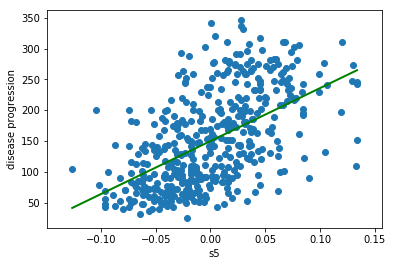

In [64]:
x_axe = plt.axes()
x_axe.scatter(diabetes_df['s5'].values, diabetes_df['target'].values)
xmin = diabetes_df['s5'].values.min()
xmax = diabetes_df['s5'].values.max()
x_axe.plot([xmin, xmax], lr_model.predict([[xmin], [xmax]]), '-', color='green', lw=2)
x_axe.set_xlabel('s5')
x_axe.set_ylabel('disease progression')
plt.show()